In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib.patches import Circle, PathPatch
# register Axes3D class with matplotlib by importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import math


In [49]:
def calc_incline(v):
    return np.arctan(v[2]/np.sqrt((v[0]**2 + v[1]**2)))

In [72]:
v1 = [1,0,0]
v2 = [np.sqrt(3) * i for i in [1,1,1]]
incline1 = calc_incline(v1)
incline2 = calc_incline(v2)
load_factor = 2
v = 5
origin = [0,0,0]
init_pos = [0,0,5]
final_pos = [10, 5, 12]
banking1 = 0
banking2 = 0

In [ ]:
#def calc_unit_x(v1, v2, banking1, banking2):
    #normal1 = np.cross(v1, )
    #normal2 = np.cross(v2, )
    #return unit_vector(np.cross(normal1, normal2))

In [73]:
def calc_rad(v, incline):
    return v**2 / ((9.8) * (-np.sin(incline) + np.sqrt(load_factor**2 + np.sin(incline)**2 - 1)))

In [74]:
def calc_r_h(): 
    return v**2 / (9.8 * (load_factor-1))

In [75]:
def calc_r_v(load_factor): 
    return v**2 / (9.8 * (load_factor**2-1) ** 0.5)

In [76]:
def vector_distance(v1, v2):
    return distance.euclidean(v1, v2)

In [77]:
def unit_vector(v):
    return v/np.linalg.norm(v, keepdims=True)

In [78]:
# need to fix w1
def calc_OO(x0, r1):
    w1 = np.linspace(x0, x0+r1, 10)
    print(x0+r1)
    return np.dot(origin, x0) + np.dot(r1, w1)

In [79]:
# Returns list of 4 possible values of X
# Assumes final_pos, init_pos, v_1, v_2 all defined in global frame
def calc_X(theta1, theta2, r1, r2, x):
    def options(sign1, sign2):
        return np.add(np.subtract(final_pos, init_pos), np.add(sign1*r1*np.tan(theta1/2*(x + v1)), 
            sign2*r2*np.tan(theta2/2*(x + v2))))
    return [options(1, 1), options(1, -1), options(-1, 1), options(-1, -1)]

[1.47283232 1.47283232 2.47283232]


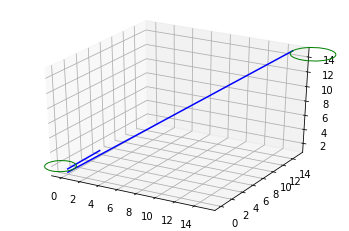

In [80]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# Assuming v is in ft/sec and uav is initially 0 incline

def draw_path(way_1, way_2):
    r1 = calc_rad(v, incline1)
    
    
    
    #xdiff = way_2[0] - way_1[0]
    #ydiff = way_2[1] - way_1[1]
    #zdiff = way_2[2] - way_1[2]
    #incline2 = np.arctan(zdiff/np.sqrt(xdiff**2 + ydiff**2))

    r2 = calc_rad(v, incline2)


    xline = np.linspace(way_1[0], way_2[0])
    yline = np.linspace(way_1[1], way_2[1])
    zline = np.linspace(way_1[2], way_2[2])
    
    vectorOO1 = calc_OO(way_1, r1)

    ax.plot3D(xline, yline, zline, 'blue')
    ax.plot3D([i[0] for i in vectorOO1], [i[1] for i in vectorOO1], [i[2] for i in vectorOO1], 'blue')

    p = Circle((way_1[0] - r1, way_1[2]), r1, facecolor='None', edgecolor='green')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=way_1[2], zdir="z")

    p = Circle((way_2[0] + r2, way_2[2]), r2, facecolor='None', edgecolor='green')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=way_2[2], zdir="z")

draw_path([0,0,1], [15,15,15])
# draw_path([15,0,1], [0,15,15])


In [59]:
# theta = np.linspace(0, 2 * np.pi)
# y = r1*np.cos(theta)
# z = r1*np.sin(theta)
# phi = np.pi / 2
# ax.plot(y*np.sin(phi)+r1*np.sin(phi), y*np.cos(phi)+r1*np.cos(phi), z)

# theta = np.linspace(0, 2 * np.pi)
# y = r2*np.cos(theta) - way_1[1] + way_2[1]
# z = r2*np.sin(theta) - way_1[2] + way_2[2]
# phi = np.pi / 2
# ax.plot(y*np.sin(phi)+r2*np.sin(phi), y, z)